In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
!kaggle datasets download -d muhammadhananasghar/human-emotions-datasethes

Dataset URL: https://www.kaggle.com/datasets/muhammadhananasghar/human-emotions-datasethes
License(s): unknown
 99% 306M/309M [00:13<00:00, 28.3MB/s]
100% 309M/309M [00:13<00:00, 24.6MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/human-emotions-datasethes.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import matplotlib.pyplot as plt
print(tf.__version__)


2.17.0


In [9]:
train_directory = "/content/Emotions Dataset/Emotions Dataset/train"
val_directory = "/content/Emotions Dataset/Emotions Dataset/test"
CLASS_NAMES = ['angry', 'happy','sad']

CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IM_SIZE": 256,
    "LEARNING_RATE": 0.001,
    "N_EPOCHS": 30,
    "DROPOUT_RATE": 0.0,
    "REGULARIZATION_RATE": 0.0,
    "N_FILTERS": 6,
    "KERNEL_SIZE": 3,
    "N_STRIDES": 1,
    "POOL_SIZE": 2,
    "N_DENSE_1": 100,
    "N_DENSE_2": 10,
    "NUM_CLASSES": 3,
}


## dataset loading

In [10]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='int',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=99
)


Found 6799 files belonging to 3 classes.


In [11]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='int',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=99
)


Found 2278 files belonging to 3 classes.


## dataset visualization

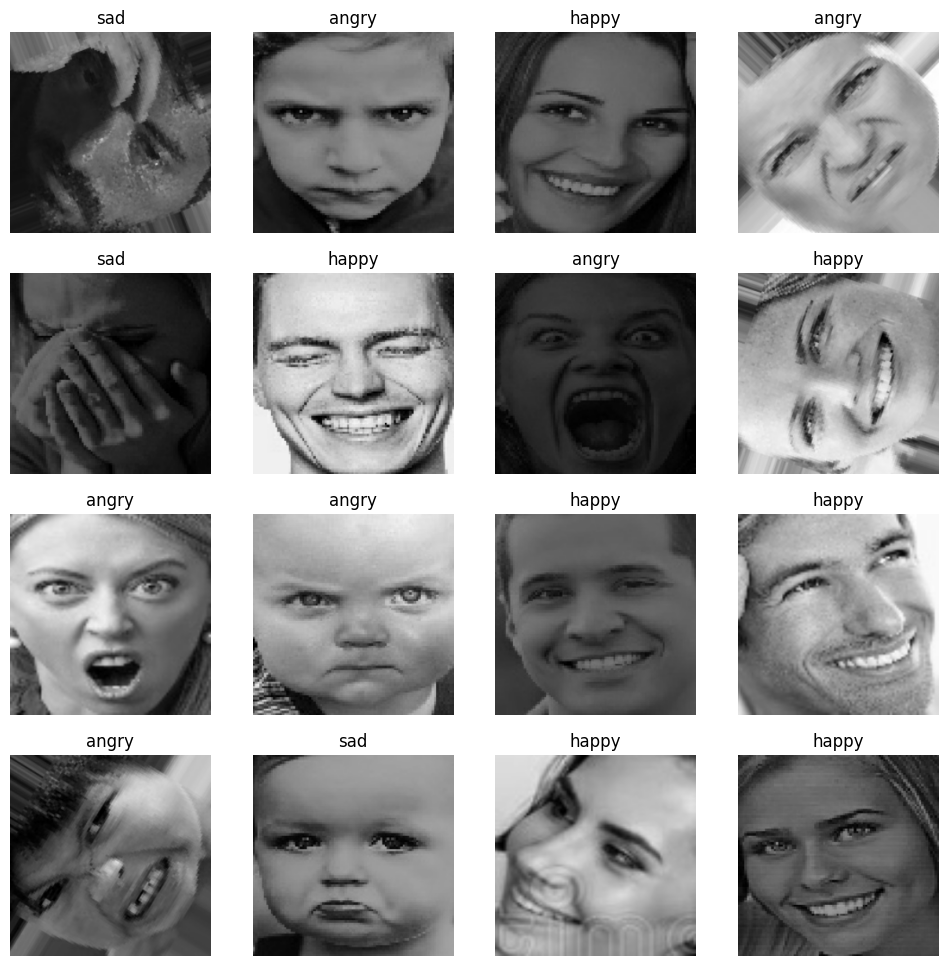

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))  # Correcting 'fisize' to 'figsize'
for image_batch, labels_batch in train_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(CLASS_NAMES[labels_batch[i]])
        plt.axis("off")  # Correcting the use of 'and'

In [13]:
training_dataset = (
    train_dataset.prefetch(tf.data.AUTOTUNE)
)


In [14]:
validation_dataset = (
    val_dataset.prefetch(tf.data.AUTOTUNE)
)


In [15]:
image_size = 256
batch_size = 32

In [16]:
resize_rescale_layer = tf.keras.Sequential([
    tf.keras.layers.Resizing(image_size, image_size),
    tf.keras.layers.Rescaling(1./255)
])

## tranfer learning

In [17]:
import tensorflow as tf
backbone = tf.keras.applications.EfficientNetB4(
    include_top=False,
    weights='imagenet',
    input_shape=(256,256,3),

)

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [18]:
backbone.trainable = False

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, BatchNormalization
from tensorflow.keras.models import Sequential



model = tf.keras.Sequential([
    Input(shape=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"], 3)),
    backbone,
    GlobalAveragePooling2D(),
    Dense(CONFIGURATION["N_DENSE_1"], activation="relu"),
    BatchNormalization(),
    Dense(CONFIGURATION["N_DENSE_2"], activation="relu"),
    Dense(CONFIGURATION["NUM_CLASSES"], activation="softmax") # Accessing with "N_CLASSES"
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb4 (Functional)          │ (None, 8, 8, 1792)          │      17,673,823 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1792)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │         179,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,854,566 (68.11 MB)

 Trainable params: 180,543 (705.25 KB)

 Non-trainable params: 17,674,023 (67.42 MB)

In [ ]:
# from tensorflow.keras.layers import InputLayer, Rescaling, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
# from tensorflow.keras.regularizers import L2

# lenet_model = tf.keras.Sequential([
#     InputLayer(input_shape=(None, None, 3)),
#     resize_rescale_layer,

#     Conv2D(filters=CONFIGURATION["N_FILTERS"], kernel_size=CONFIGURATION["KERNEL_SIZE"],
#            strides=CONFIGURATION["N_STRIDES"]*2, activation='relu',
#            kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),
#     BatchNormalization(),
#     MaxPool2D(pool_size=CONFIGURATION["POOL_SIZE"], strides=CONFIGURATION["N_STRIDES"]*2),
#     Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),

#     Conv2D(filters=CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size=CONFIGURATION["KERNEL_SIZE"],
#            strides=CONFIGURATION["N_STRIDES"]*2, activation='relu',
#            kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),
#     BatchNormalization(),
#     MaxPool2D(pool_size=CONFIGURATION["POOL_SIZE"], strides=CONFIGURATION["N_STRIDES"]*2),

#     Flatten(),
#     Dense(CONFIGURATION["N_DENSE_1"], activation="relu",
#       kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),
#     BatchNormalization(),
#     Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),

#     Dense(CONFIGURATION["N_DENSE_2"], activation="relu",
#           kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),
#     BatchNormalization(),

#     Dense(CONFIGURATION["NUM_CLASSES"], activation="softmax"),
# ])
# lenet_model.summary()


## training

In [21]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy, SparseTopKCategoricalAccuracy
from tensorflow.keras.optimizers import Adam # Import Adam optimizer


# Use SparseCategoricalCrossentropy for integer-encoded labels
loss_function = SparseCategoricalCrossentropy()
metrics = [
    SparseCategoricalAccuracy(name="accuracy"),
    SparseTopKCategoricalAccuracy(k=2, name="top_k_accuracy")
]

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=CONFIGURATION['LEARNING_RATE']), # Now Adam is recognized
    loss=loss_function,
    metrics=metrics
)

# Train the model
history = model.fit(
    training_dataset,
    validation_data=validation_dataset,
    epochs=20,
    verbose=1
)

Epoch 1/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 142s 429ms/step - accuracy: 0.6083 - loss: 0.8581 - top_k_accuracy: 0.8680 - val_accuracy: 0.6984 - val_loss: 0.6842 - val_top_k_accuracy: 0.9083
Epoch 2/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 53s 147ms/step - accuracy: 0.7567 - loss: 0.5784 - top_k_accuracy: 0.9297 - val_accuracy: 0.7489 - val_loss: 0.5849 - val_top_k_accuracy: 0.9271
Epoch 3/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 41s 148ms/step - accuracy: 0.7813 - loss: 0.5174 - top_k_accuracy: 0.9404 - val_accuracy: 0.7691 - val_loss: 0.5599 - val_top_k_accuracy: 0.9363
Epoch 4/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 44s 160ms/step - accuracy: 0.8054 - loss: 0.4743 - top_k_accuracy: 0.9437 - val_accuracy: 0.7858 - val_loss: 0.5197 - val_top_k_accuracy: 0.9289
Epoch 5/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 38s 148ms/step - accuracy: 0.8179 - loss: 0.4480 - top_k_accuracy: 0.9581 - val_accuracy: 0.7805 - val_loss: 0.5386 - val_top_k_accuracy: 0.9271
Epoch 6/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 41s 147ms/step - accuracy: 0.8192 

In [22]:
model.evaluate(validation_dataset) # Corrected the method name to 'evaluate'

72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.8022 - loss: 0.5590 - top_k_accuracy: 0.9336


[0.538042426109314, 0.8103599548339844, 0.9394205212593079]

## testing

In [30]:
import cv2
import tensorflow as tf

test_image = cv2.imread("/content/Emotions Dataset/Emotions Dataset/test/sad/104709.jpg_brightness_1.jpg")

# Resize the image to 256x256 using OpenCV
test_image = cv2.resize(test_image, (256, 256))

im = tf.constant(test_image, dtype = tf.float32)

im = tf.expand_dims(im, axis = 0)

print(CLASS_NAMES[tf.argmax(model(im), axis = -1).numpy()[0]])

sad


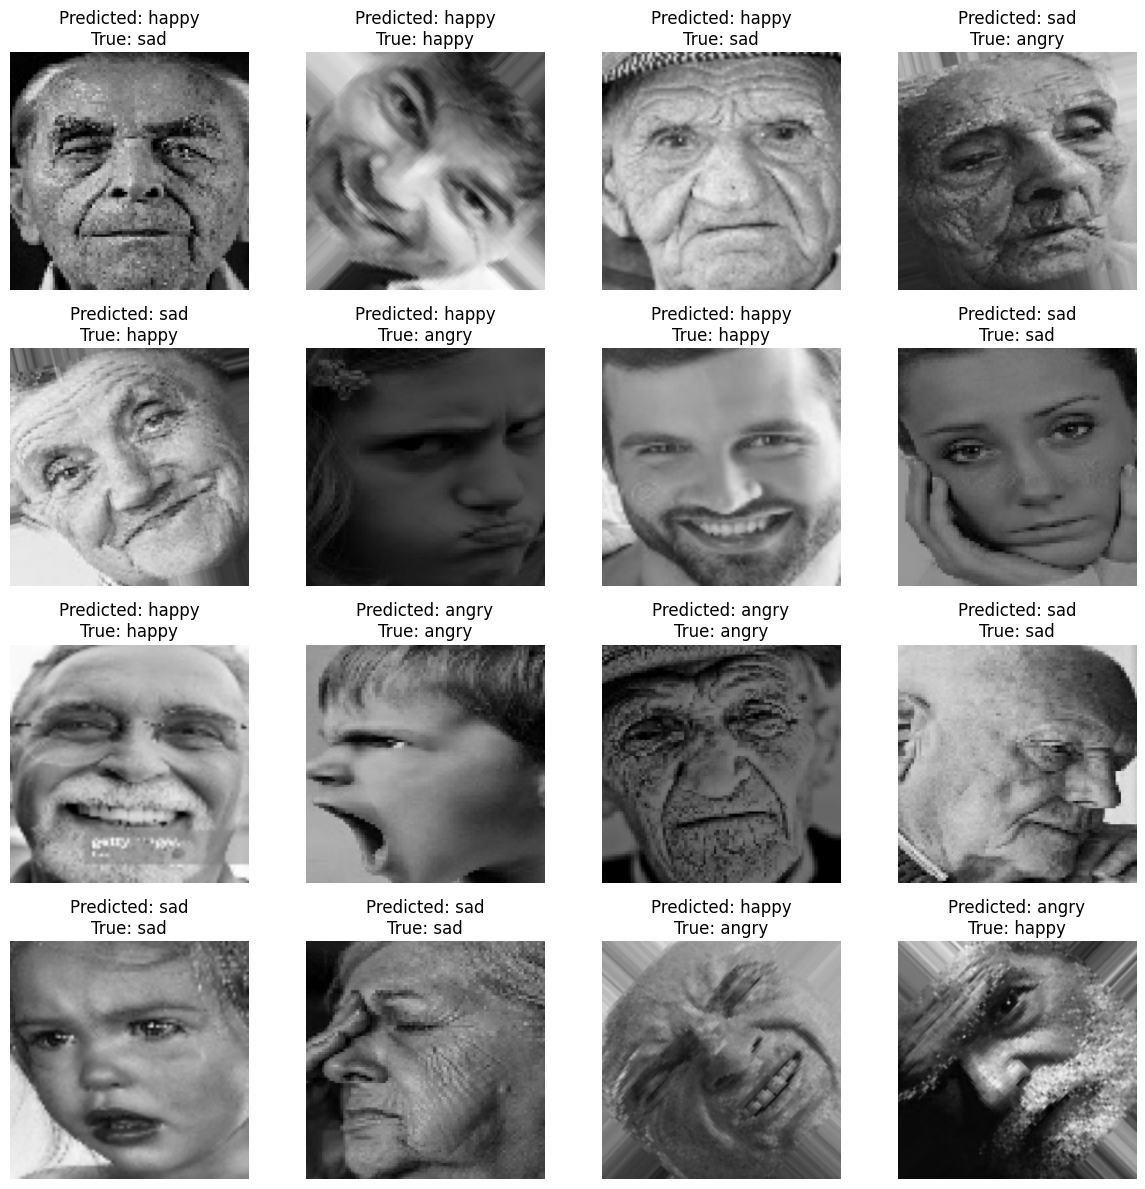

In [27]:
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(12, 12))  # Set the figure size
for image_batch, labels_batch in validation_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)

        # Display the image
        plt.imshow(image_batch[i].numpy().astype("uint8"))

        # Get the predicted label
        predicted_label = tf.argmax(model(image_batch[i:i+1]), axis=1).numpy()[0]

        # Set the title with both predicted and true labels
        plt.title(f"Predicted: {CLASS_NAMES[predicted_label]}\nTrue: {CLASS_NAMES[labels_batch[i]]}")
        plt.axis("off")  # Turn off axis labels

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [31]:
import tensorflow as tf

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('human_emotion_detection.tflite', 'wb') as f:
    f.write(tflite_model)

from google.colab import files

# Download the TFLite model file
files.download('human_emotion_detection.tflite')




Saved artifact at '/tmp/tmpngn6lswj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_482')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  139095408293872: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  139094940695040: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  139093783890048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139093783889520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139093783895504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139093783891808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139093783891984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139093783954704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139093783958048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139093783960688: TensorSpec(shape=(), dtype=tf.resource, name=

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

# Save the quantized model
with open('model_quant.tflite', 'wb') as f:
    f.write(tflite_quant_model)
from google.colab import files

# Download the TFLite model file
files.download('human_emotion_detection.tflite')


Saved artifact at '/tmp/tmplhqnnb_4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_482')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  139095408293872: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  139094940695040: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  139093783890048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139093783889520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139093783895504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139093783891808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139093783891984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139093783954704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139093783958048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139093783960688: TensorSpec(shape=(), dtype=tf.resource, name=

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>